---
Tom Curran

Problem Set \#4

MACS 30100

Monday February 5, 2018

---

1. **Multiple linear regression** (4 points). 

For this problem, you will use the 397 observations from the Auto.csv dataset.1 This dataset includes 397 obser- vations on miles per gallon (mpg), number of cylinders (cylinders), engine dis- placement (displacement), horsepower (horsepower), vehicle weight (weight), acceleration (acceleration), vehicle year (year), vehicle origin (origin), and vehicle name (name).
(a) Import the data using pandas.read csv() function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the na values=... option.

(a) Import the data using pandas.read csv() function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the na values=... option.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.iolib.summary2 import summary_col

%matplotlib notebook
autos_df = pd.read_csv("Auto.csv", na_values = '?')

/Users/thomascurran/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
print(autos_df.isnull().sum())

autos_df.dropna(inplace = True)

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [3]:
print(autos_df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [4]:
print("------------------------------------Data Frame Description----------------------------")
print("")
print(autos_df.describe())

------------------------------------Data Frame Description----------------------------

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000  

b) Produce a scatterplot matrix which includes all of the quantitative vari- ables (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin). [Use the pandas scatterplot function in the code block be- low.]

<IPython.core.display.Javascript object>


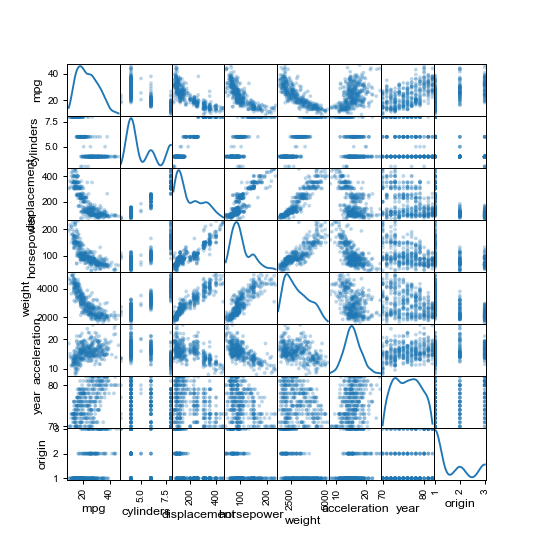

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ce4eb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e6945c0>]], dtype=object)

In [5]:
df_quant = autos_df.select_dtypes(include = ['float64', 'int64'])

scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6), diagonal = 'kde')

(c) Compute the correlation matrix for the quantitative variables (8×8) using the DataFrame.corr() method.

In [6]:
#Compute the correlation matrix for the quantitative variables (8×8) using the DataFrame.corr() method.
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Estimate the following multiple linear regression model of mpg on all other quantitative variables, where ui is an error term for each observation, using Python’s statsmodels.api.OLS() function.


$$
mpg_{i} = \beta_0 + \beta_1 cylinders_{i} + \beta_2 dislacement_i + \beta_3 weight_i + \beta_4 acceleration_i + \beta_5 year_i + \beta_6 origin
$$

In [7]:
#reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')

df_quant['constant'] = 1


model8 = sm.OLS(endog = df_quant.mpg, 
                exog = df_quant[['constant',
                                 'cylinders',
                                 'displacement',
                                 'horsepower',
                                 'weight',
                                 'acceleration',
                                 'year',
                                 'origin']], 
                missing = 'drop').fit()

print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        01:18:36   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707   

*i.Which of the coefficients is statistically significant at the 1% level?*

At the 1% level the significant variables are weight, year, and origin.

*ii. Which of the coefficients is NOT statistically significant at the 10% level?*

Cylinders ($\beta_1$), horsepower ($\beta_3$), and acceleration ($\beta_5$) are not significant at the 10% level.

*iii. Give an interpretation in words of the estimated coefficient $\beta_6$ on $year_i$ using the estimated value of $\beta_6$.*

According to the regression the coefficient on the $year_i$ variabe means that for each additional year (i.e. a one unit increase) the mpg of the car in question will increase by approximately .76 (.7574 to be exact). This means that the relationship between a cars year and its mpg is positively correlated so that the more recent the car year, the better the miles per gall it has. 

(e) Looking at your scatterplot matrix from part (b), what are the three vari- ables that look most likely to have a nonlinear relationship with mpgi?

<IPython.core.display.Javascript object>


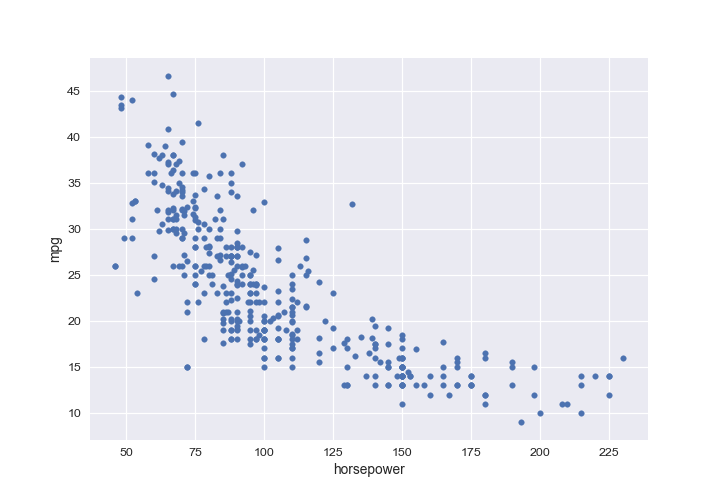

In [8]:
plt.style.use('seaborn')
autos_df.plot(x = 'horsepower', y = 'mpg', kind = 'scatter')

<IPython.core.display.Javascript object>


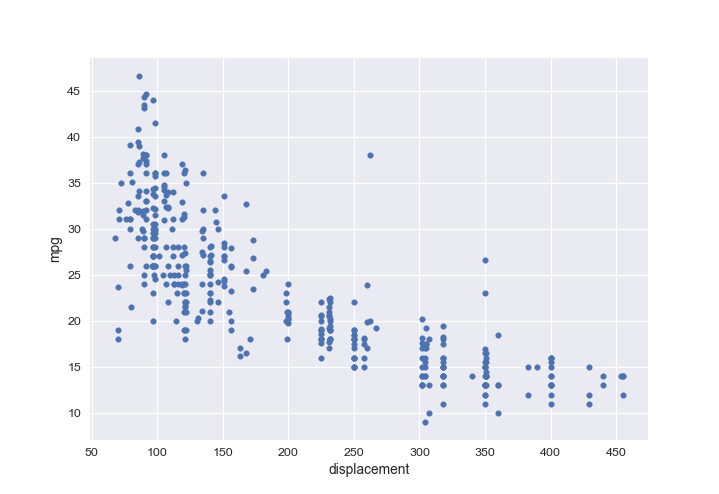

In [9]:
autos_df.plot(x = 'displacement', y = 'mpg', kind = 'scatter')

<IPython.core.display.Javascript object>


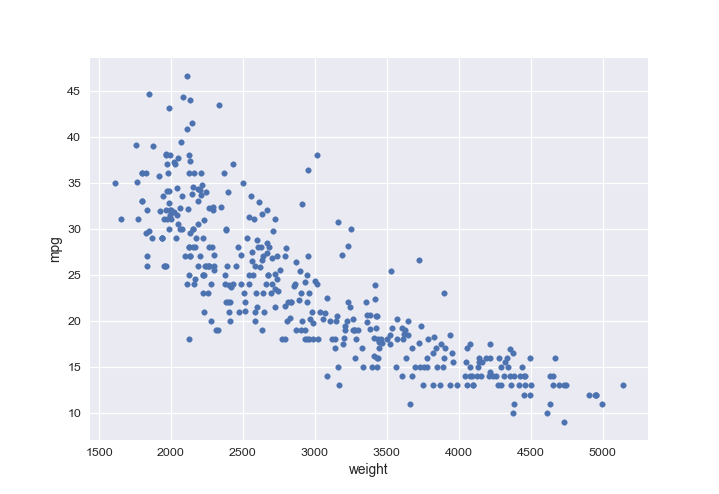

In [10]:
autos_df.plot(x = 'weight', y = 'mpg', kind = 'scatter')

i. Estimate a new multiple regression model by OLS in which you include squared terms on the three variables you identified as having a non- linear relationship to mpgi as well as a squared term on accelerationi.


In [11]:
polyvars = ['displacement', 'weight', 'acceleration', 'horsepower']

for i in polyvars:
    varname = i+"^2"
    df_quant[varname] = df_quant[i].apply(lambda x: x ** 2)
    
df_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,constant,displacement^2,weight^2,acceleration^2,horsepower^2
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,94249.0,12278016,144.00,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,122500.0,13638249,132.25,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,101124.0,11806096,121.00,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,92416.0,11785489,144.00,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,91204.0,11895601,110.25,19600.0


In [12]:
polyReg = sm.OLS(endog = df_quant.mpg,
                exog = df_quant[['constant',
                                 'cylinders',
                                 'displacement',
                                 'displacement^2',
                                 'horsepower',
                                 'horsepower^2',
                                 'weight',
                                 'weight^2',
                                 'acceleration',
                                 'acceleration^2',
                                 'year',
                                 'origin']],missing = 'drop').fit()

polyReg.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        01:18:36   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          20.1084      6.696      3.003      0.003       6.943      33.274
cylinders          0.2519      0.326      0.773      0.440      -0.389       0.893
displacement      -0.0169      0.020     -0.828      0.408      -0.057       0.023
displacement^2  2.257e-05   3.61e-05      0.626      0.532   -4.83e-05    9.35e-05
horsepower        -0.1635      0.041     -3.971      0.000      -0.244      -0.083
horsepower^2       0.0004      0.000      2.943      0.003       0.000       0.001
weight            -0.0136      0.003     -5.069      0.000      -0.019      -0.008
weight^2        1.514e-06   3.69e-07      4.105      0.000    7.89e-07    2.24e-06
acceleration      -2.0884      0.557     -3.752      0.000      -3.183      -0.994
acceleration^2     0.0576      0.016      3.496      0.001       0.025       0.090
year               0.7810      0.045     17.512      0.000       0.693       0.869
origin             0.6104      0.263      2.320      0.021       0.093       1.128
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.985
Skew:                           0.438   Prob(JB):                     1.16e-17
Kurtosis:                       5.002   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*ii. Report your adjusted R-squared statistic. Is it better or worse than the adjusted R-squared from part (d)?*

The r-squared for the polynomail regression (regression from ei) is better than the regression from part d. the polynomial regression has an r-squared value of .87 while the regression from part b has an r-squared value of .82.

*iii. What happened to the statistical significance of the displacement variable coefficient and the coefficient on its squared term?*

Both $displacement$ and $displacement^2$ variables are not statistically signficant

*iv. What happened to the statistical significance of the cylinders variable?*

Cylinders is no loger significant in the regresison model, both having P values great than .1

f)Using the regression model from part (e) and the .predict() function, what would be the predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1?

In [13]:
const = 1
cyl = 6
disp = 200
disp_sq = disp**2
hp = 100
hp_sq = hp ** 2
wght = 3100
wght_sq = wght**2
acc = 15.1
acc_sq = acc**2
modyear = 99
org = 1

params = [const, cyl, disp, disp_sq, hp, hp_sq, wght, wght_sq, acc, acc_sq, modyear, org]

polyReg.predict(exog = params)


array([ 38.7321111])